In [3]:
import numpy as np
from numpy.linalg import matrix_power

precize = 0.0001

n = 10
a1 = 1 / n
a2 = 0.5
a3 = 1 - a1 - a2

pi = np.array([[0.5, 0.25, 0.25],
               [0.5 - 1 / (10 + n), 0, 0.5 + 1 / (10 + n)],
               [0.25, 0.25, 0.5]
               ])

pi_transposed = pi.T

pi_for_solve = np.array([[pi_transposed[0][0] - 1, pi_transposed[0][1], pi_transposed[0][2]],
                         [pi_transposed[1][0], pi_transposed[1][1] - 1, pi_transposed[1][2]],
                         [1, 1, 1]
                         ])

P_lim = np.linalg.solve(pi_for_solve, np.array([0, 0, 1]))

P_0 = np.array([a1, a2, a3])

n = 0
while 1:
    n += 1

    pi_transposed_npow = matrix_power(pi_transposed, n)
    P_n = np.matmul(pi_transposed_npow, P_0)

    if max(abs(np.subtract(P_n, P_lim))) < precize:
        break

print("Iterations:", n)
print("P_0 =", P_0)
print("P_n =", P_n)
print("P_lim =", P_lim)

Iterations: 6
P_0 = [0.1 0.5 0.4]
P_n = [0.38659668 0.20007324 0.41333008]
P_lim = [0.38666667 0.2        0.41333333]


M_0 = [0.5116279069767442, 0.27906976744186046, 0.20930232558139536]
a = [1.007, 1.001, 1.004]


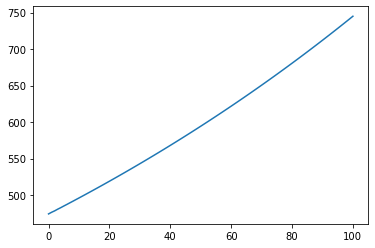

In [8]:
P = [
    [0.1, 0, 0.7],
    [0.1, 0.3, 0.2],
    [0.8, 0.7, 0.1]
]

K_birth = [22, 12, 9]
K_death = [15, 11, 5]
population_start = 474.3

a = [0, 0, 0]
for s in range(3):
    a[s] = (1000 + K_birth[s] - K_death[s]) / 1000


K_birth_sum = sum(K_birth)
moment_0 = [x / K_birth_sum for x in K_birth]
moment_prev = moment_0
moment_next = moment_0

print("M_0 =", moment_0)
print("a =", a)

moment_list = [sum(moment_0) * population_start]
year_count = 100
for k in range(year_count):
    moment_prev = moment_next.copy()
    for j in range(3):
        moment_sum = 0
        for s in range(3):
            moment_sum += P[j][s] * a[s] * moment_prev[s]
        moment_next[j] = moment_sum
    moment_list.append(sum(moment_next) * population_start)


import matplotlib.pyplot as plt

plt.plot(moment_list)
plt.show()